In [1]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [3]:
df=yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-10-22,29918.654297,30199.433594,29720.312500,29993.896484,29993.896484,10446520040
2023-10-23,30140.685547,34370.437500,30097.828125,33086.234375,33086.234375,38363572311
2023-10-24,33077.304688,35150.433594,32880.761719,33901.527344,33901.527344,44934999645


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

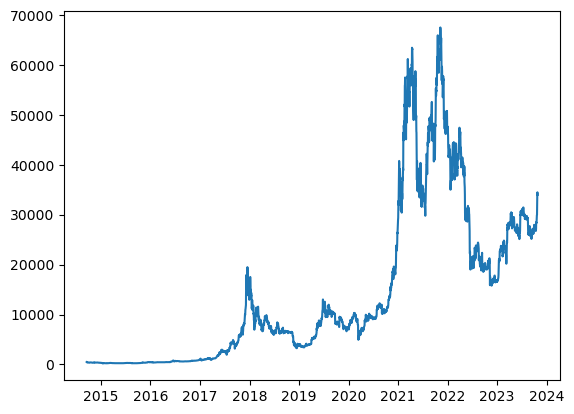

In [6]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [7]:
to_row=int(len(df)*0.9)
training_data= list(df[0:to_row]['Adj Close'])
training_data

[457.3340148925781,
 424.44000244140625,
 394.7959899902344,
 408.90399169921875,
 398.8210144042969,
 402.1520080566406,
 435.7909851074219,
 423.2049865722656,
 411.5740051269531,
 404.42498779296875,
 399.5199890136719,
 377.1809997558594,
 375.4670104980469,
 386.9440002441406,
 383.614990234375,
 375.0719909667969,
 359.5119934082031,
 328.8659973144531,
 320.510009765625,
 330.0790100097656,
 336.18701171875,
 352.94000244140625,
 365.0260009765625,
 361.56201171875,
 362.29901123046875,
 378.54901123046875,
 390.41400146484375,
 400.8699951171875,
 394.77301025390625,
 382.5559997558594,
 383.75799560546875,
 391.4419860839844,
 389.5459899902344,
 382.8450012207031,
 386.4750061035156,
 383.1579895019531,
 358.4169921875,
 358.3450012207031,
 347.27099609375,
 354.7040100097656,
 352.989013671875,
 357.6180114746094,
 335.59100341796875,
 345.30499267578125,
 338.3210144042969,
 325.7489929199219,
 325.8919982910156,
 327.5539855957031,
 330.49200439453125,
 339.4859924316406,


In [8]:
testing_data=list(df[to_row:]['Adj Close'])
testing_data

[16217.322265625,
 16444.982421875,
 17168.56640625,
 16967.1328125,
 17088.66015625,
 16908.236328125,
 17130.486328125,
 16974.826171875,
 17089.50390625,
 16848.126953125,
 17233.474609375,
 17133.15234375,
 17128.724609375,
 17104.193359375,
 17206.4375,
 17781.318359375,
 17815.650390625,
 17364.865234375,
 16647.484375,
 16795.091796875,
 16757.9765625,
 16439.6796875,
 16906.3046875,
 16817.53515625,
 16830.341796875,
 16796.953125,
 16847.755859375,
 16841.986328125,
 16919.8046875,
 16717.173828125,
 16552.572265625,
 16642.341796875,
 16602.5859375,
 16547.49609375,
 16625.080078125,
 16688.470703125,
 16679.857421875,
 16863.23828125,
 16836.736328125,
 16951.96875,
 16955.078125,
 17091.14453125,
 17196.5546875,
 17446.29296875,
 17934.896484375,
 18869.587890625,
 19909.57421875,
 20976.298828125,
 20880.798828125,
 21169.6328125,
 21161.51953125,
 20688.78125,
 21086.79296875,
 22676.552734375,
 22777.625,
 22720.416015625,
 22934.431640625,
 22636.46875,
 23117.859375,
 

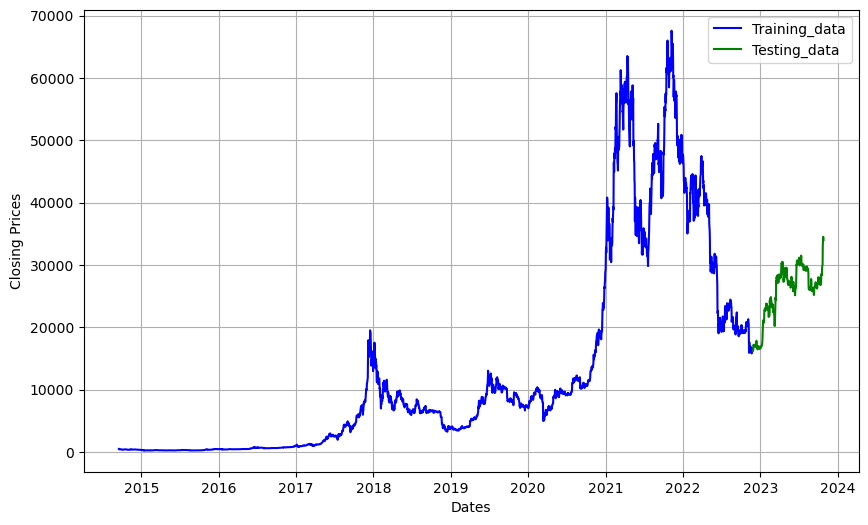

In [9]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'blue',label='Training_data')
plt.plot(df[to_row:]['Adj Close'],'green',label='Testing_data')
plt.legend()

In [10]:
model_prediction=[]
n_test_obser=len(testing_data)

In [11]:
for i in range(n_test_obser):
    model=ARIMA(training_data,order=(4,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output)
    model_prediction.append(yhat)
    actual_test_value=testing_data[i]
    training_data.append(actual_test_value)

In [12]:

print(model_fit.summary())
len(testing_data)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3326
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -26854.874
Date:                Thu, 26 Oct 2023   AIC                          53719.749
Time:                        21:54:48   BIC                          53750.295
Sample:                             0   HQIC                         53730.679
                               - 3326                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0231      0.009     -2.554      0.011      -0.041      -0.005
ar.L2          0.0095      0.009      1.096      0.273      -0.007       0.026
ar.L3          0.0222      0.009      2.383      0.0

333

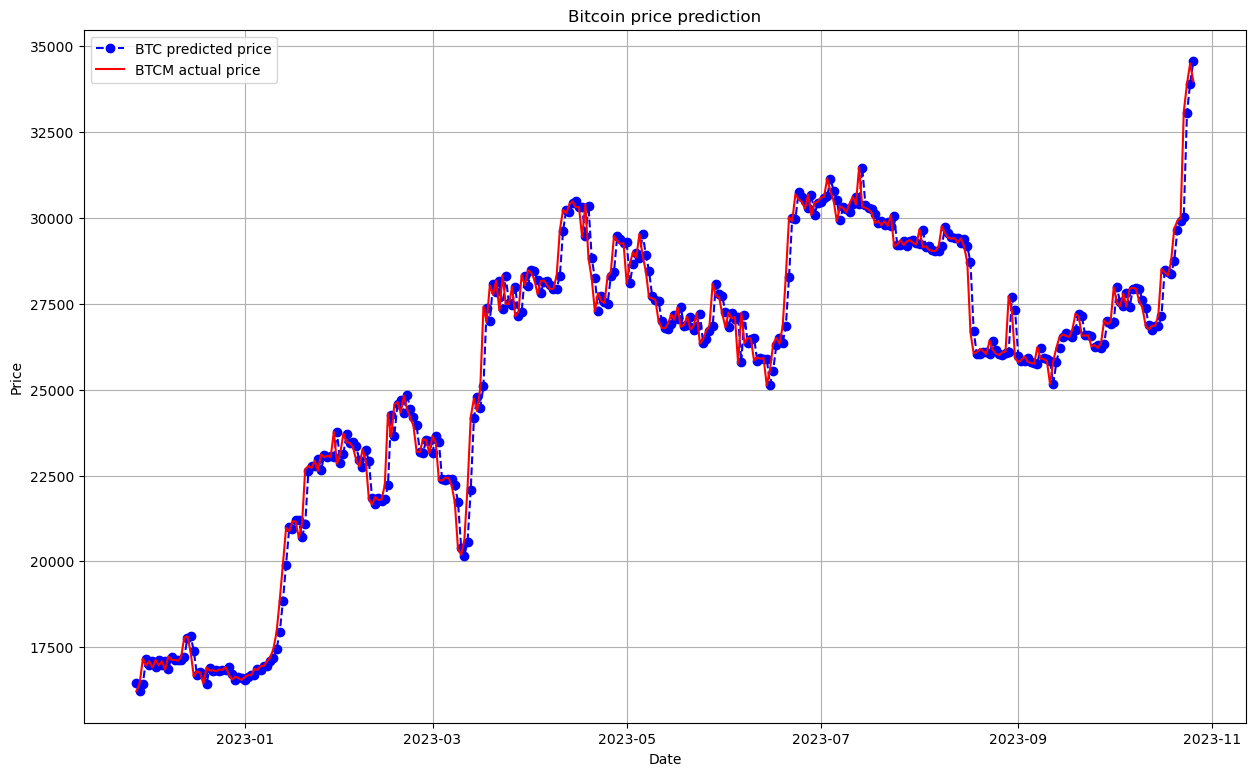

In [13]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range=df[to_row:].index

plt.plot(date_range,model_prediction,color='blue',marker='o',linestyle='dashed',label='BTC predicted price')
plt.plot(date_range,testing_data,color='red',label='BTCM actual price')

plt.title('Bitcoin price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
mape=np.mean(np.abs(np.array(model_prediction)-np.array(testing_data))/np.abs(testing_data))
print('MAPE:'+str(mape))

MAPE:0.20055911450316052
